# Enunciado
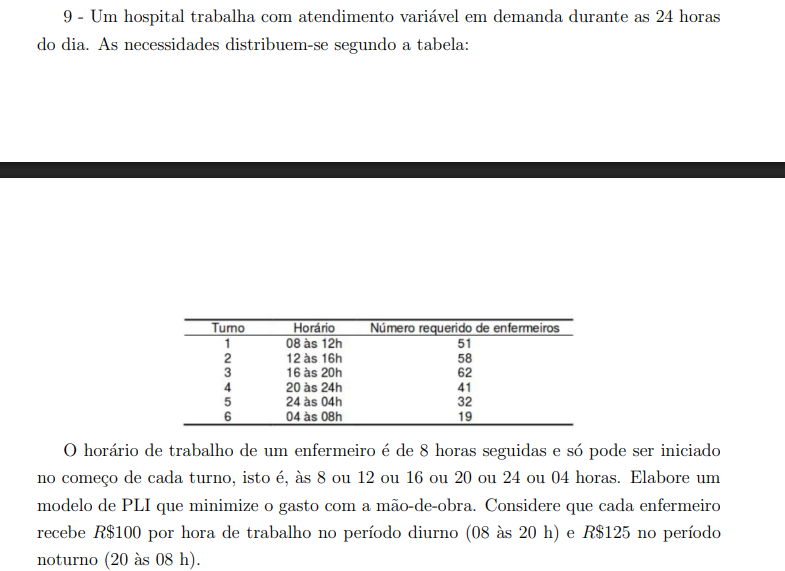

In [ ]:
import gurobipy as gp
from gurobipy import GRB

try:
    #  DADOS DE ENTRADA 
    turnos = ["08_16", "12_20", "16_24", "20_04", "24_08", "04_12"]

    # Custos por enfermeira em cada plantão
    custos = {
        "08_16": 800,
        "12_20": 800,
        "16_24": 900,
        "20_04": 1000,
        "24_08": 1000,
        "04_12": 900
    }

    # Quantidade mínima de enfermeiras por intervalo de 8 horas
    demandas = {
        1: {"turnos": ("08_16", "04_12"), "min": 51},
        2: {"turnos": ("12_20", "08_16"), "min": 58},
        3: {"turnos": ("16_24", "12_20"), "min": 62},
        4: {"turnos": ("20_04", "16_24"), "min": 41},
        5: {"turnos": ("24_08", "20_04"), "min": 32},
        6: {"turnos": ("24_08", "04_12"), "min": 19}
    }

    #  MODELO 
    modelo = gp.Model("Minimizar_Custo_Enfermaria")

    #  VARIÁVEIS DE DECISÃO 
    enfermeiras = modelo.addVars(turnos, vtype=GRB.INTEGER, name="Enfermeiras")

    #  FUNÇÃO OBJETIVO 
    modelo.setObjective(
        gp.quicksum(custos[t] * enfermeiras[t] for t in turnos),
        GRB.MINIMIZE
    )

    # RESTRIÇÕES 
    for i, info in demandas.items():
        t1, t2 = info["turnos"]
        modelo.addConstr(enfermeiras[t1] + enfermeiras[t2] >= info["min"], name=f"Demanda_{i}")

    #  OTIMIZAÇÃO 
    modelo.optimize()

    # RESULTADOS 
    print("\n" + "="*60)
    print("        RESULTADO DA OTIMIZAÇÃO - ENFERMARIA")
    print("="*60)

    if modelo.status == GRB.OPTIMAL:
        print(f"\n Status: Solução ótima encontrada!")
        print(f"Custo Mínimo Total: R$ {modelo.objVal:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
        print("\n Alocação ideal de enfermeiras por plantão:")

        total = 0
        for t in turnos:
            qtde = int(enfermeiras[t].X)
            total += qtde
            print(f"  - Plantão {t.replace('_', 'h às ')}h: {qtde} enfermeiras")

        print("-"*60)
        print(f" Total de enfermeiras contratadas: {total}")
        print("="*60)

    else:
        print(f"\n Nenhuma solução ótima encontrada. (Status: {modelo.status})")

except gp.GurobiError as e:
    print(f"Erro no Gurobi [código {e.errno}]: {e}")
except Exception as e:
    print(f"Ocorreu um erro geral: {e}")


# Resultados
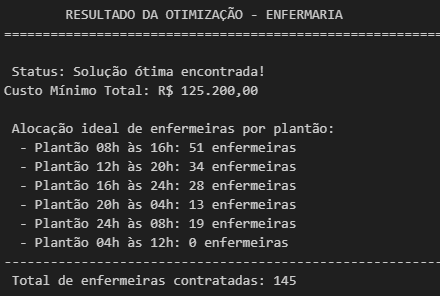